In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


### Drop unnecessary columns

In [6]:
unnecessary_col = ['PassengerId', 'Cabin', 'Ticket', 'Name']

df.drop(unnecessary_col, axis =1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Converted the object value

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sex_converted = label_encoder.fit_transform(df['Sex'])
print(label_encoder.classes_)
print(sex_converted)

print('---------')
embarked_converted = label_encoder.fit_transform(df['Embarked'])
print(label_encoder.classes_)
print(embarked_converted)

['female' 'male']
[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 

In [10]:
df_converted = df.copy()

In [11]:
df_converted.Sex = sex_converted
df_converted.Embarked = embarked_converted

In [12]:
df_converted.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,32.699854,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,14.346821,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,45.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [13]:
df_converted.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Split train test dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_converted.drop('Pclass', axis =1)
y = df_converted['Pclass']

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
svc_m = SVC(gamma=0.01, C = 150)
svc_m.fit(X_train, y_train)

SVC(C=150, gamma=0.01)

In [19]:
pred_svm = svc_m.predict(X_test)
print('SVM score :')
survived_score_svm = accuracy_score(y_test, pred_svm, normalize=True)
survived_score_svm

SVM score :


0.8876404494382022

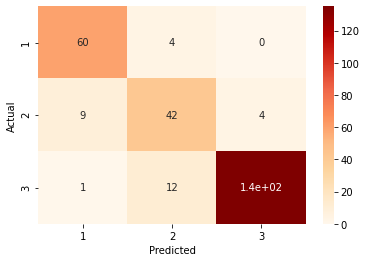

In [20]:
con_matrix = pd.crosstab(y_test, pred_svm, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(con_matrix, annot=True, cmap='OrRd')
plt.show()

In [21]:
val = np.diag(con_matrix).sum()
mis = np.array(con_matrix)
np.fill_diagonal(mis, 0)
text = f"""from above confussion, we can see that {val} value get correct prediction, 
and the others {mis.sum()} miss predicted"""

print(text)

from above confussion, we can see that 237 value get correct prediction, 
and the others 30 miss predicted


## Predict the other variable 

In [22]:
df_converted.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
## Other Dependent variable need to be predicted

dv_variable = ['Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

< Survived > Cofussion Matrix , Score : 74 %


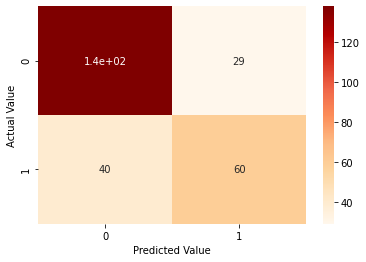

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted

< Sex > Cofussion Matrix , Score : 75 %


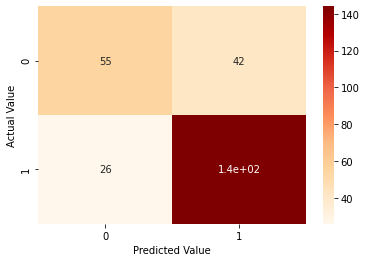

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted

< SibSp > Cofussion Matrix , Score : 76 %


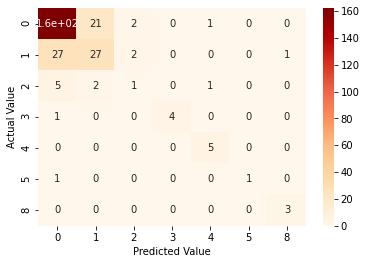

from above confussion matrix, we can see that 203 value get correct prediction,
and the others 64 miss predicted

< Parch > Cofussion Matrix , Score : 82 %


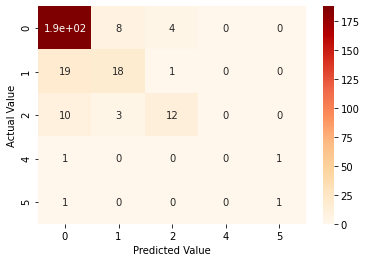

from above confussion matrix, we can see that 219 value get correct prediction,
and the others 48 miss predicted

< Embarked > Cofussion Matrix , Score : 71 %


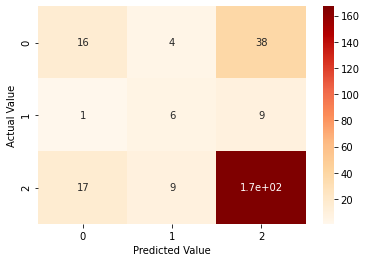

from above confussion matrix, we can see that 189 value get correct prediction,
and the others 78 miss predicted



In [27]:
all_score = {}
all_score['Pclass'] = survived_score_svm

for dv in dv_variable:
    X = df_converted.drop(dv, axis =1)
    y = df_converted[dv]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 18)
    
    indexing = (y_test2.value_counts().sort_index().index)
    
    svc_m = SVC(gamma=0.01, C = 150)
    svc_m.fit(X_train2, y_train2)
    pred2 = svc_m.predict(X_test2)
    
    score_gnb = accuracy_score(y_test2, pred2, normalize=True)
    
    all_score[dv] = score_gnb
    
    print('<',dv, '> Cofussion Matrix', ', Score :', round(score_gnb*100), '%')
    con_mat = pd.DataFrame(confusion_matrix(y_test2, pred2), columns= indexing, index=indexing)
    
    sns.heatmap(con_mat, annot=True, cmap='OrRd')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
    plt.show()

    temp = []
    for i in con_mat.columns:
        for x in con_mat.index:
            if x == i :
                temp.append(con_mat.loc[x, i])
                
    val = sum(temp)
    
    text = f"""from above confussion matrix, we can see that {val} value get correct prediction,
and the others {len(y_test2) - val} miss predicted"""
    print(text)
    
    print('=======================================================================\n')

In [25]:
df_score = pd.DataFrame(data=(all_score.values()), index=all_score.keys(), columns = ['Accuracy'])
df_score

,Accuracy
Pclass,0.887640
Survived,0.741573
Sex,0.745318
SibSp,0.760300
Parch,0.820225
Embarked,0.707865
